In [4]:
from tensorflow.keras.datasets import mnist

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import tensorflow as tf

In [7]:
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

In [9]:
xtrain.shape # (60000, 28, 28) 
xtest.shape # (10000, 28, 28)

(10000, 28, 28)

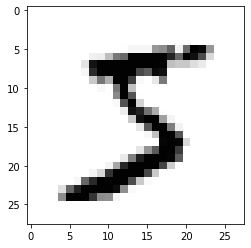

In [10]:
plt.imshow(xtrain[0], cmap='Greys')

In [11]:
ytrain[0]

5

In [ ]:
# 기본적인 깊은 신경망(DNN, 멀티퍼셉트론)

In [16]:
xtrain=xtrain.reshape(xtrain.shape[0], 784).astype('float32')/255 # 최소값 0, 최대값 255
xtest=xtest.reshape(xtest.shape[0], 784).astype('float32')/255 # 최소값 0, 최대값 255

In [22]:
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # 적절한 수준에서 끊는 것

In [20]:
ytrain=to_categorical(ytrain) 
ytest=to_categorical(ytest)

In [33]:
# 모델 설정
model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
#환경 설정
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [35]:
#모델 저장 경로 설정
import os

if not os.path.exists('./mnist_model/'):  # . 이 현재 폴더를 의미
    os.mkdir('./mnist_model/')

In [36]:
modelpath='./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [37]:
cp=ModelCheckpoint(
    filepath=modelpath, monitor='val_loss',
    save_best_only=True)

In [38]:
esc=EarlyStopping(monitor='val_loss', patience=10)

In [39]:
history=model.fit(
    xtrain, ytrain, validation_data=(xtest, ytest),
    epochs=30, batch_size=200, callbacks=[cp, esc])

Epoch 1/30
300/300 [==============================] - 2s 8ms/step - loss: 2.3016 - accuracy: 0.1111 - val_loss: 1.5666 - val_accuracy: 0.5199
Epoch 2/30
300/300 [==============================] - 2s 7ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 1.5715 - val_accuracy: 0.4855
Epoch 3/30
300/300 [==============================] - 2s 7ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 1.7154 - val_accuracy: 0.4603
Epoch 4/30
300/300 [==============================] - 2s 7ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.0421 - val_accuracy: 0.4450
Epoch 5/30
300/300 [==============================] - 2s 6ms/step - loss: 2.3007 - accuracy: 0.1124 - val_loss: 2.7220 - val_accuracy: 0.4043
Epoch 6/30
300/300 [==============================] - 2s 6ms/step - loss: 2.3003 - accuracy: 0.1124 - val_loss: 3.7915 - val_accuracy: 0.3755
Epoch 7/30
300/300 [==============================] - 2s 6ms/step - loss: 2.2994 - accuracy: 0.1124 - val_loss: 5.3600 - val_accuracy: 0.3787
Epoch 

In [40]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 28.7341 - accuracy: 0.3577


[28.734066009521484, 0.357699990272522]

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 컨볼루션 깊은 신경망(CNN)

In [43]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout

In [48]:
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

In [50]:
xtrain=xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')/255
xtest=xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')/255
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [52]:
xtrain.shape
xtest.shape

(10000, 28, 28, 1)

In [ ]:
#드롭아웃(drop out) : 히든계층에 있는 노드 중에 일부만 학습하도록 선택
#-> 오버피팅을 줄일 수 있음
#->Dropout(0.25) #해당 계층 노드 중에서 25%는 학습에서 제외, 75%를 선택하여 학습

In [58]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# 32 = 특징의 개수 (마스크 필터)
# kernel_size = 필터의 크기
# input_shape = (  ,  ) 행, 열
# activation = 활성화함수
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) # 25%는 제외
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 50%는 제외
model.add(Dense(10, activation='softmax'))

In [54]:
#환경 설정
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [55]:
modelpath='./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [56]:
cp=ModelCheckpoint(
    filepath=modelpath, monitor='val_loss',
    save_best_only=True)
esc=EarlyStopping(monitor='val_loss', patience=10)

In [57]:
history=model.fit(
    xtrain, ytrain, validation_data=(xtest, ytest),
    epochs=30, batch_size=200, callbacks=[cp, esc])

Epoch 1/30
300/300 [==============================] - 44s 147ms/step - loss: 0.9512 - accuracy: 0.7119 - val_loss: 0.3370 - val_accuracy: 0.8994
Epoch 2/30
300/300 [==============================] - 42s 140ms/step - loss: 0.3069 - accuracy: 0.9089 - val_loss: 0.2550 - val_accuracy: 0.9246
Epoch 3/30
300/300 [==============================] - 41s 137ms/step - loss: 0.2472 - accuracy: 0.9260 - val_loss: 0.2176 - val_accuracy: 0.9360
Epoch 4/30
300/300 [==============================] - 45s 149ms/step - loss: 0.2022 - accuracy: 0.9393 - val_loss: 0.1833 - val_accuracy: 0.9428
Epoch 5/30
 44/300 [===>..........................] - ETA: 37s - loss: 0.1775 - accuracy: 0.9450

KeyboardInterrupt: 

In [59]:
from tensorflow.keras.datasets import fashion_mnist

In [61]:
(trainx, trainy), (testx, testy) = fashion_mnist.load_data() # 이미지 데이터

In [63]:
trainx.shape
testx.shape

(10000, 28, 28)

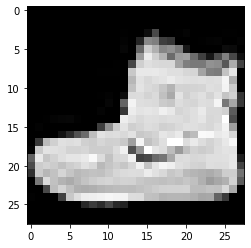

In [65]:
plt.imshow(trainx[0], cmap='gray')

In [66]:
trainy[0]

9

In [ ]:
#CNN으로 모델 구현